In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway, levene, pearsonr, ttest_ind
import seaborn as sns
import statsmodels.api as sm

# Task 1 - Become familiar with the dataset

According to the project description the columns in the dataset have
the following interpretation:
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per ${\$}$10000
- PTRATIO : pupil-teacher ratio by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in ${\$}$1000s

# Task 3 - Load the Dataset

Get the dataset and drop the first column which is an index column

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

Below we can find general information about the dataset:
- 506 rows and 13 columns
- Columns share the same data type: float64
- There are no missing values

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Below we can find some statistics for each column

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


According to task 1, the column MEDV contains the data regarding the "Median value of owner-occupied homes". Below you have a boxplot visualization of this variable. Some quick observations can be drawn:

- Properties with values above 37000 (approximately) are outliers
- The values of the first quartile, median and third quartiles obtained above are consistent with this plot.
- Distance of the whiskers to the first and third quartiles are similiar. Also the the distances from the first and third quartiles to the median are similar. The distribution is very close to a symmetric one if we do not consider the outliers

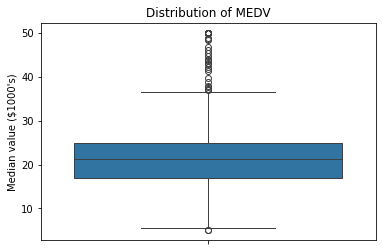

In [8]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set(
    ylabel="Median value ($1000's)",
    title="Distribution of MEDV"
)
plt.show()

Below we have a barplot of the CHAS dummy variable. According to Task 1 a value of 1 means that the town is bounded by the Charles River and 0 means otherwise. The plot hints that houses in locations bounded by the Charles River might be more valuable than houses that are not bounded by it.

/var/folders/p7/_5pjyhx11sx_d0f1y6srwnth0000gn/T/ipykernel_20020/1392854019.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


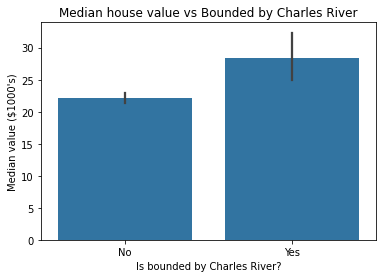

In [9]:
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
ax.set(
    xlabel="Is bounded by Charles River?",
    xticklabels=["No", "Yes"],
    ylabel="Median value ($1000's)",
    title="Median house value vs Bounded by Charles River"
)
plt.show()

Create 3 age groups

In [10]:
boston_df["age_group"] = ""
# age <= 35
boston_df.loc[
    boston_df["AGE"] <= 35, "age_group"
] = "age <= 35"
# 35 < age < 70
boston_df.loc[
    (boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"
] = "35 < age < 70"
# age > 70
boston_df.loc[
    boston_df["AGE"] >= 70, "age_group"
] = "age >= 70"

Below we find the distribution of the median value of owner-occupied units as for three different AGE groups:
- For each group we can find outliers on the  high-values side
- The difference in the locations of the first quartile, median and second quartile are not negligeble
- The median values in the age group >= 70 tend to be the lowest as compared with the other two age groups
- The age group <= 35 is the most skewed to higher median values

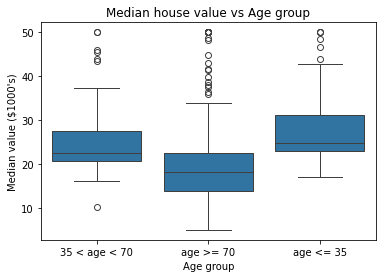

In [11]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
ax.set(
    xlabel="Age group",
    ylabel="Median value ($1000's)",
    title="Median house value vs Age group"
)
plt.show()

Below we have a scatter plot that examines the relationship between the nitric oxides concentration and the proportion of non-retail business acres. Overall, places with a higher concentration of nitric oxides have a higher proportion of non-retail business acres. Although the relationship is not linear, I expect a positive correlation coefficient.

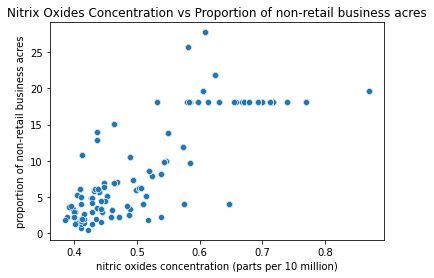

In [12]:
ax = sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
ax.set(
    title="Nitrix Oxides Concentration vs Proportion of non-retail business acres",
    xlabel="nitric oxides concentration (parts per 10 million)",
    ylabel="proportion of non-retail business acres"
)
plt.show()

The histogram of pupil to teacher ratio and its kernel density estimate are displayed below. The shape is not close to a normal distribution and the values are not concentrated near the mean and median values (check cell 7 for reference).

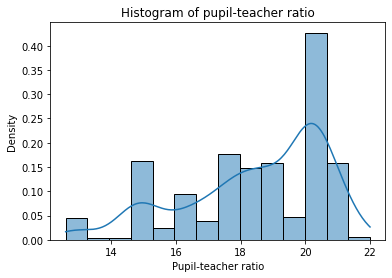

In [13]:
ax = sns.histplot(data=boston_df, x="PTRATIO", stat="density", kde=True)
ax.set(
    title="Histogram of pupil-teacher ratio",
    xlabel="Pupil-teacher ratio"
)
plt.show()

# Task 5: Use the appropriate tests to answer the questions

## Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

/var/folders/p7/_5pjyhx11sx_d0f1y6srwnth0000gn/T/ipykernel_20020/523008504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df["MEDV"],


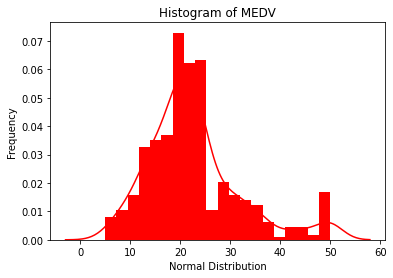

In [14]:
ax = sns.distplot(boston_df["MEDV"],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(title="Histogram of MEDV", xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [15]:
# Split the data into two groups
bounded_by_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
not_bounded_by_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]

Before performing the t-test we perform the Levene test on the two groups to check if they come from populations with the same variance. In the Levene test, the null hypothesis is that that all input samples are from populations with equal variances. In the cell below we have used scipy.stats.levene function to perform this test and we have obtained a p-value smaller than 0.05. We reject the null hypothesis of the Levene's test and conclude that the two groups come from populations with different variances.

In [16]:
levene(bounded_by_river, not_bounded_by_river, center="mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the two samples come from populations with different variances we perfom the t-test using the scipy.stats.ttest_ind function with equal_var=False. The null hypothesis for this test is that 2 independent samples have identical average values.

In [17]:
ttest_ind(bounded_by_river, not_bounded_by_river, equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median house prices bounded by the Charles river

## Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable. We will use the same groups as in Task 4:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older


In [18]:
# Split the data into 3 groups
age_leq_35_medv = boston_df[boston_df["age_group"] == 'age <= 35']["MEDV"]
age_gt_35_lt_70_medv = boston_df[boston_df["age_group"] == '35 < age < 70']["MEDV"]
age_geq_70_medv = boston_df[boston_df["age_group"] == 'age >= 70']["MEDV"]

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Test that the population variaces of the groups are all equal

In [19]:
levene(
    age_leq_35_medv,
    age_gt_35_lt_70_medv, 
    age_geq_70_medv,
    center="mean"
)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater 0.05 we fail to reject the null hypothesis of Levene test and hence we assume the population variances of the three groups are all equal, which is an important assumption of ANOVA.

In [20]:
f_oneway(age_leq_35_medv, age_gt_35_lt_70_medv, age_geq_70_medv)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is significant evidence that at least one of the three means differ.

## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

*   $H\_0:$ Nitric oxide concetrations are not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concetrations are correlated with proportion of non-retail business acres per town

In [21]:
pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

The null hypothesis:

*   $H\_0: β1$ = 0 (weighted distance to the five Boston employment centers has no impact on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centers has impact on the median value of owner occupied homes)


In [22]:
## X is the input variables (or independent variables)
X = boston_df["DIS"]
## y is the target/dependent variable
y = boston_df["MEDV"]
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        14:19:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

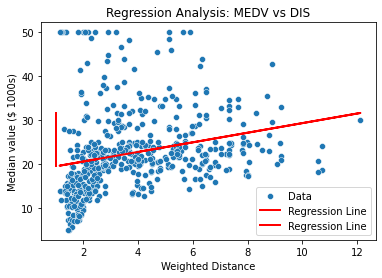

In [23]:
ax = sns.scatterplot(data=boston_df, x="DIS", y="MEDV", label="Data")
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
ax.set(
    title="Regression Analysis: MEDV vs DIS",
    xlabel="Weighted Distance",
    ylabel="Median value ($ 1000s)"
)
plt.legend()
plt.show()

**Conclusion:** the p-value < 0.05, there is evidence that the weighted distance to the 5 Boston employment centers has an impact on the median value of owner-occupied homes. With a β1 equal to 1.09 this means that if the weighted distance increases by 1, the median value of owner-occupied homes increases by 1090 dollars